In [1]:
! jupyter labextension install @jupyterlab/debugger


Error executing Jupyter command 'labextension': [Errno 2] No such file or directory


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
x = np.linspace(0, 100, 100)
y = x + np.random.randn(100)*5

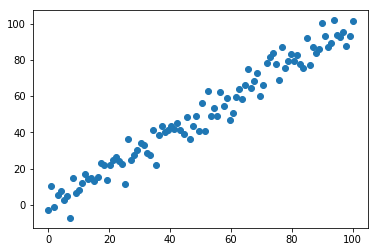

In [4]:
plt.scatter(x, y)

In [193]:
z = np.array([1]*len(y)).reshape(-1,1)
y = y.reshape(-1, 1)
xx = np.concatenate((z, x.reshape(-1, 1)), axis = 1)

### Ridge Regression 

In [194]:
def sdgL2(x, y, niter = 1000, lmbda = .1, lr = .01):
    w = np.random.randn(x.shape[1]).reshape(-1, 1)/10000
    for i in range(niter):
        epoch_loss = 0.0
        for xi, yi in zip(x, y):
            xi = xi.reshape(-1, 1)
            w = w.reshape(-1, 1)
            y_ = xi.T@w
            grad = xi@(y_ - yi) + lmbda*w
            w = w - lr*grad
           
            yi = float(yi)
            y_ = float(y_)
            
            loss = (yi-y_)**2
            epoch_loss += float(loss)
        print("epoch"+str(i)+":  loss = "+str(epoch_loss/len(x)))
    print(w)

In [195]:
sdgL2(xx, y, niter = 100, lmbda = .1, lr = .00001)

epoch0:  loss = 538.9155844446916
epoch1:  loss = 24.7146364990755
epoch2:  loss = 23.675930049047825
epoch3:  loss = 23.658235417278757
epoch4:  loss = 23.657675311129363
epoch5:  loss = 23.6576400080767
epoch6:  loss = 23.657621237307826
epoch7:  loss = 23.65760300434397
epoch8:  loss = 23.65758480540087
epoch9:  loss = 23.657566624597212
epoch10:  loss = 23.657548461419353
epoch11:  loss = 23.657530315837793
epoch12:  loss = 23.657512187838226
epoch13:  loss = 23.65749407740686
epoch14:  loss = 23.657475984529903
epoch15:  loss = 23.65745790919355
epoch16:  loss = 23.657439851384083
epoch17:  loss = 23.657421811087776
epoch18:  loss = 23.657403788290843
epoch19:  loss = 23.657385782979595
epoch20:  loss = 23.6573677951403
epoch21:  loss = 23.657349824759248
epoch22:  loss = 23.657331871822727
epoch23:  loss = 23.65731393631705
epoch24:  loss = 23.657296018228575
epoch25:  loss = 23.657278117543616
epoch26:  loss = 23.657260234248497
epoch27:  loss = 23.65724236832959
epoch28:  loss 

In [196]:
def sdgL1(x, y, niter = 1000, lmbda = .001, lr = .0001):
    w = np.random.randn(x.shape[1]).reshape(-1, 1)/1000
    for i in range(niter):
        epoch_loss = 0.0
        for xi, yi in zip(x, y):
            xi = xi.reshape(-1, 1)
            w = w.reshape(-1, 1)
            y_ = xi.T@w
            grad = xi@(y_ - yi) + np.sign(w)
            w = w - lr*grad
            
            yi = float(yi)
            y_ = float(y_)
            
            loss = (yi-y_)**2
            epoch_loss += float(loss)
        print("epoch"+str(i)+":  loss = "+str(epoch_loss/len(x)))
    print(w)

In [197]:
sdgL1(xx, y, niter = 100, lmbda = 10, lr = .00001)


epoch0:  loss = 541.3102464951892
epoch1:  loss = 24.748143321924044
epoch2:  loss = 23.686215615918297
epoch3:  loss = 23.667948614257003
epoch4:  loss = 23.667485608481567
epoch5:  loss = 23.66756902746233
epoch6:  loss = 23.66766995148045
epoch7:  loss = 23.667771726071248
epoch8:  loss = 23.667873826150153
epoch9:  loss = 23.667976234940756
epoch10:  loss = 23.668078951686297
epoch11:  loss = 23.66818197613491
epoch12:  loss = 23.668285308050898
epoch13:  loss = 23.668388947199155
epoch14:  loss = 23.668492893344624
epoch15:  loss = 23.66859714625252
epoch16:  loss = 23.668701705688147
epoch17:  loss = 23.668806571416916
epoch18:  loss = 23.668911743204422
epoch19:  loss = 23.669017220816315
epoch20:  loss = 23.669123004018488
epoch21:  loss = 23.66922909257688
epoch22:  loss = 23.669335486257587
epoch23:  loss = 23.669442184826885
epoch24:  loss = 23.66954918805108
epoch25:  loss = 23.66965649569672
epoch26:  loss = 23.669484344630597
epoch27:  loss = 23.669449147469777
epoch28:  

### Poission Regression 
    

In [198]:
y = np.around(y)


In [199]:
def predict(w, x):
    # x is a batch 
    return np.exp(np.dot(x, w))


In [200]:
w = np.random.randn(xx.shape[1]).reshape(-1, 1)/10000

In [201]:
print(w.shape)

print(predict(w, xx).shape)

(2, 1)
(100, 1)


In [207]:
def sdgPoission(x, y, niter = 1000, lmbda = .001, batch_size = 50, lr = .0001):
    w = np.random.randn(x.shape[1]).reshape(-1, 1)/10000
    for i in range(niter):
        epoch_loss = 0.0
        
        for b in range(0, len(x), batch_size):
            x_b = x[b: b+batch_size]
            y_b = y[b: b+batch_size]
            
            y_pred = predict(w, x_b)

            loss = np.sum(y_b * np.log(y_pred) - y_pred)/batch_size
            epoch_loss += loss 
            
            grad = x_b.T@(y_pred - y_b) + lmbda*w
            w -= lr*grad 
        
        print("epoch"+str(i)+":  loss = "+str(epoch_loss/len(x)))
    return w

In [208]:
w = sdgPoission(xx, y, niter = 1000, lmbda = 0.001, batch_size = 50, lr = .0000001)

epoch0:  loss = 0.23300322789837144
epoch1:  loss = 2.2514890607841536
epoch2:  loss = 2.5425568932149645
epoch3:  loss = 1.776740290612089
epoch4:  loss = 2.74007876153947
epoch5:  loss = 2.612011888862753
epoch6:  loss = 2.5205221199226475
epoch7:  loss = 1.6837727701296255
epoch8:  loss = 2.762307051868636
epoch9:  loss = 2.701742829782789
epoch10:  loss = 2.613625053470329
epoch11:  loss = 2.077493182120822
epoch12:  loss = 2.6237351733043486
epoch13:  loss = 2.120399972053875
epoch14:  loss = 2.6036114336549074
epoch15:  loss = 2.034677094349526
epoch16:  loss = 2.6435690588272163
epoch17:  loss = 2.204603512170836
epoch18:  loss = 2.5641538211633144
epoch19:  loss = 1.867078151398643
epoch20:  loss = 2.711972049748372
epoch21:  loss = 2.49422723094436
epoch22:  loss = 2.481962690375136
epoch23:  loss = 1.5215252927088994
epoch24:  loss = 2.7824625414766406
epoch25:  loss = 2.7787260994306124
epoch26:  loss = 2.7698571819323807
epoch27:  loss = 2.730464104424486
epoch28:  loss = 2

In [209]:
y_ = predict(w, xx)

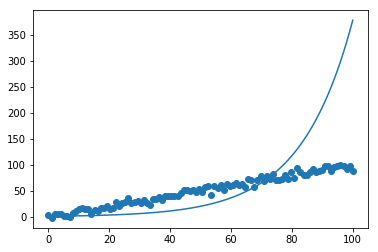

In [210]:
plt.scatter(xx[:,1], y)
plt.plot(xx[:,1], y_)